In [1]:
import pandas as pd

df = pd.read_excel('2020TMP.xls', sheet_name='2020TMP')
df

,FECHA,HORA,ACO,AJM,AJU,BJU,CHO,CUA,CUT,FAC,...,PED,SAC,SAG,SFE,TAH,TLA,UAX,UIZ,VIF,XAL
0,2020-01-01,1,11.8,12.6,-99.0,14.3,13.8,12.4,7.7,10.0,...,13.3,-99,16.0,11.7,12.8,13.5,13.0,15.3,13.5,14.9
1,2020-01-01,2,11.3,-99.0,-99.0,13.8,13.0,12.0,7.8,9.3,...,12.8,-99,15.7,11.2,12.1,-99.0,12.2,15.0,13.0,-99.0
2,2020-01-01,3,10.8,-99.0,-99.0,13.9,13.1,12.1,7.1,8.6,...,12.2,-99,15.5,11.0,12.0,-99.0,12.5,14.7,12.3,-99.0
3,2020-01-01,4,9.9,-99.0,-99.0,13.6,13.7,11.0,6.4,8.0,...,11.4,-99,15.1,10.5,11.9,-99.0,13.0,14.9,11.9,-99.0
4,2020-01-01,5,9.0,-99.0,-99.0,13.3,14.0,11.2,5.6,7.1,...,10.9,-99,14.7,10.5,11.7,-99.0,12.0,14.4,11.4,-99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31,20,13.4,-99.0,3.4,13.9,-99.0,-99.0,13.6,13.3,...,12.8,-99,15.0,10.6,-99.0,14.2,12.4,15.2,15.0,14.0
8780,2020-12-31,21,12.8,-99.0,0.3,12.7,-99.0,-99.0,12.2,11.8,...,11.7,-99,14.1,9.1,-99.0,13.0,11.7,14.5,14.1,13.0
8781,2020-12-31,22,12.2,-99.0,-1.1,11.9,-99.0,-99.0,11.1,10.0,...,10.2,-99,13.4,8.2,-99.0,11.8,11.5,13.8,13.0,12.1
8782,2020-12-31,23,11.1,-99.0,-1.6,11.6,-99.0,-99.0,8.7,9.2,...,9.8,-99,12.6,7.8,11.2,11.3,11.3,13.3,11.7,11.4


In [2]:
alcaldias = ['ACO', 'AJM', 'AJU', 'BJU', 'CHO', 'CUA', 'CUT', 'FAC', 'FAR', 'GAM', 'HGM', 'INN', 'LAA', 'MER', 'MGH', 'MON', 'MPA', 'NEZ', 'PED', 'SAC', 'SAG', 'SFE', 'TAH', 'TLA', 'UAX', 'UIZ', 'VIF', 'XAL'
]

In [3]:
# Normalizando los valores de cada alcaldia, cambiando los -99 que representan null a NAN
import numpy as np

df_clear =df.replace([-99], np.nan)

In [4]:
# Sacando el promedio de la temperatura de todas las ubicaciones
data = {'FECHA': df_clear['FECHA'], 'HORA': df_clear['HORA'], 'PROMEDIO_DE_TODAS_LAS_ALCALDIAS': df_clear[alcaldias].mean(axis=1)}

df_prod = pd.DataFrame(data)

In [5]:
# Obteniendo promedio de la temperatura de todo el día
def dividir():
    data = {'FECHA': [], 'TEMPERATURA': []}
    
    limite = 24
    for i in range(0, len(df_prod), 24):
        data['TEMPERATURA'].append(df_prod['PROMEDIO_DE_TODAS_LAS_ALCALDIAS'][limite-24:limite].mean())
        data['FECHA'].append(df_prod['FECHA'][i])
        limite += 24
    return data

In [7]:
df_new = pd.DataFrame(dividir())
df_new

,FECHA,TEMPERATURA
0,2020-01-01,15.860412
1,2020-01-02,15.324635
2,2020-01-03,14.548718
3,2020-01-04,11.120192
4,2020-01-05,11.299038
...,...,...
361,2020-12-27,13.166667
362,2020-12-28,12.378570
363,2020-12-29,12.375519
364,2020-12-30,13.081612


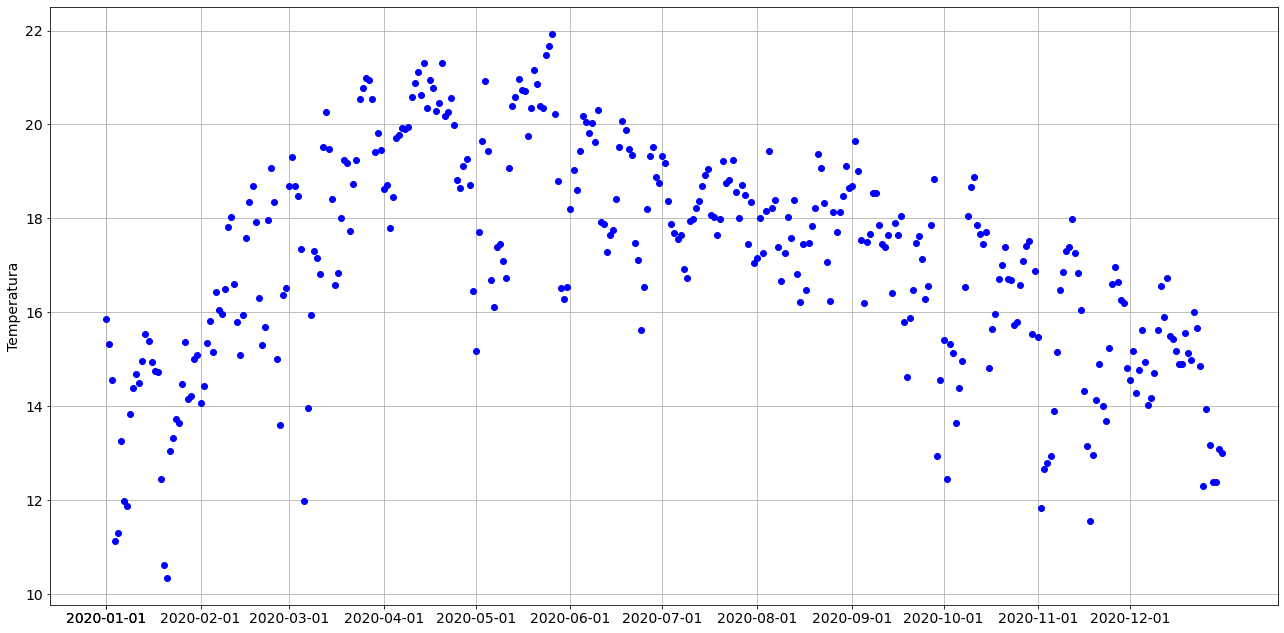

In [8]:
# Representación gráfica del conjunto de datos
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(22, 11))
plt.plot(df_new['FECHA'], df_new['TEMPERATURA'], 'bo')

plt.ylabel('Temperatura', fontsize=14)
plt.xticks(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2020-01'], fontsize=14)
plt.yticks(fontsize=14)
plt.grid()

plt.show()

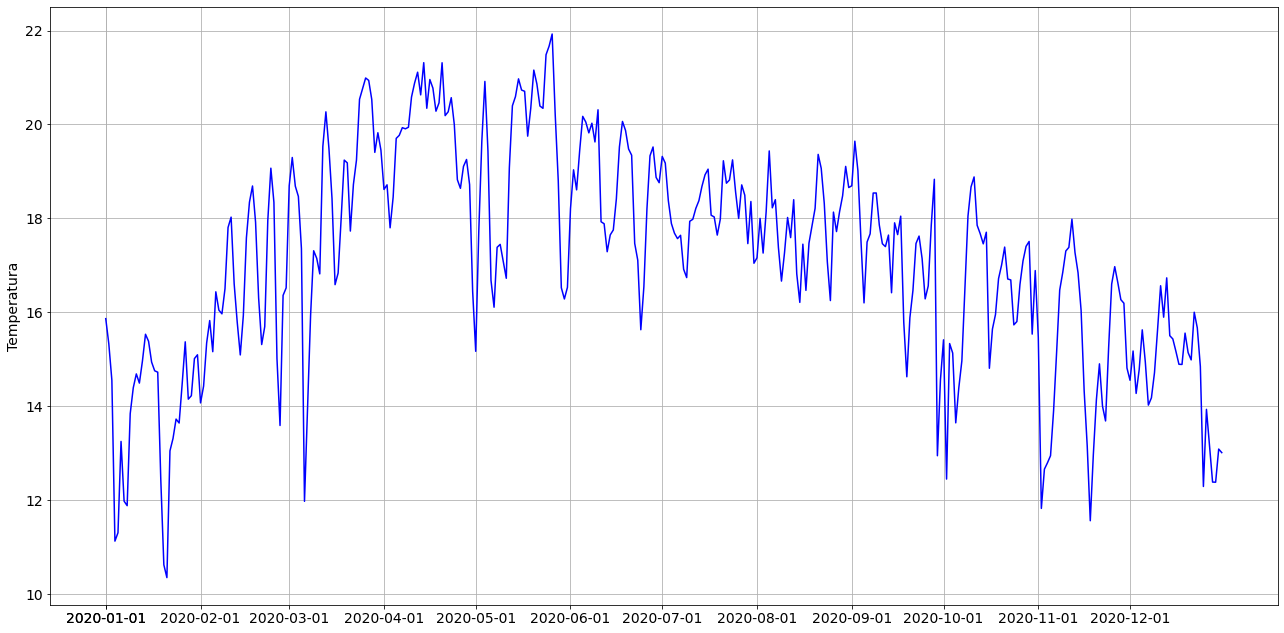

In [9]:
# Representación gráfica del conjunto de datos
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(22, 11))
plt.plot(df_new['FECHA'], df_new['TEMPERATURA'], 'b')

plt.ylabel('Temperatura', fontsize=14)
plt.xticks(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2020-01'], fontsize=14)
plt.yticks(fontsize=14)
plt.grid()

plt.show()

In [10]:
# Calculamos Exponentially Weighted Moving Average sobre un ejemplo
def ewma(theta, b=0.9):
    if len(theta) == 1:
        return b*0 + (1-b)*theta[-1]
    return b*ewma(theta[:-1]) + (1-b)*theta[-1]

In [12]:
# Aplicamos bias correction
import numpy as np

def apply_ewma_bias_corr(data, b=0.9):
    v_data = []
    for i in np.arange(1, len(data) + 1):
        print('\rProcesando ejemplo: {0}'.format(i), end='')
        v_data.append(ewma(data[:i], b=b) / (1-b**i))
    return v_data

In [13]:
v_df = apply_ewma_bias_corr(list(df_new['TEMPERATURA']))

Procesando ejemplo: 366

In [14]:
v_df

[15.86041210480341,
 15.57842395247773,
 15.198458637437222,
 14.012571365048467,
 13.349942148787573,
 13.327467383944093,
 13.067735079016598,
 12.858446998222645,
 13.018094616614498,
 13.228283873622702,
 13.440320452494817,
 13.586276822936718,
 13.770284156487278,
 13.998241639596552,
 14.172046473606311,
 14.26566756818367,
 14.323793255862379,
 14.370428351544305,
 14.146542498500876,
 13.744584253532137,
 13.362585615683615,
 13.327258905056425,
 13.325142911224258,
 13.368089579480927,
 13.397043558540933,
 13.512285049807968,
 13.709190520522665,
 13.755249248805407,
 13.803926822515534,
 13.929831531643766,
 14.050517341770268,
 14.052086141895998,
 14.090359603969159,
 14.219124402623361,
 14.383336331179423,
 14.462446734388696,
 14.663563141990096,
 14.804002906456393,
 14.921861305172822,
 15.081953009864014,
 15.357821216594997,
 15.627645856585696,
 15.726259888765895,
 15.732212131349614,
 15.66717843468459,
 15.693633140947092,
 15.883738807470902,
 16.1312751792026

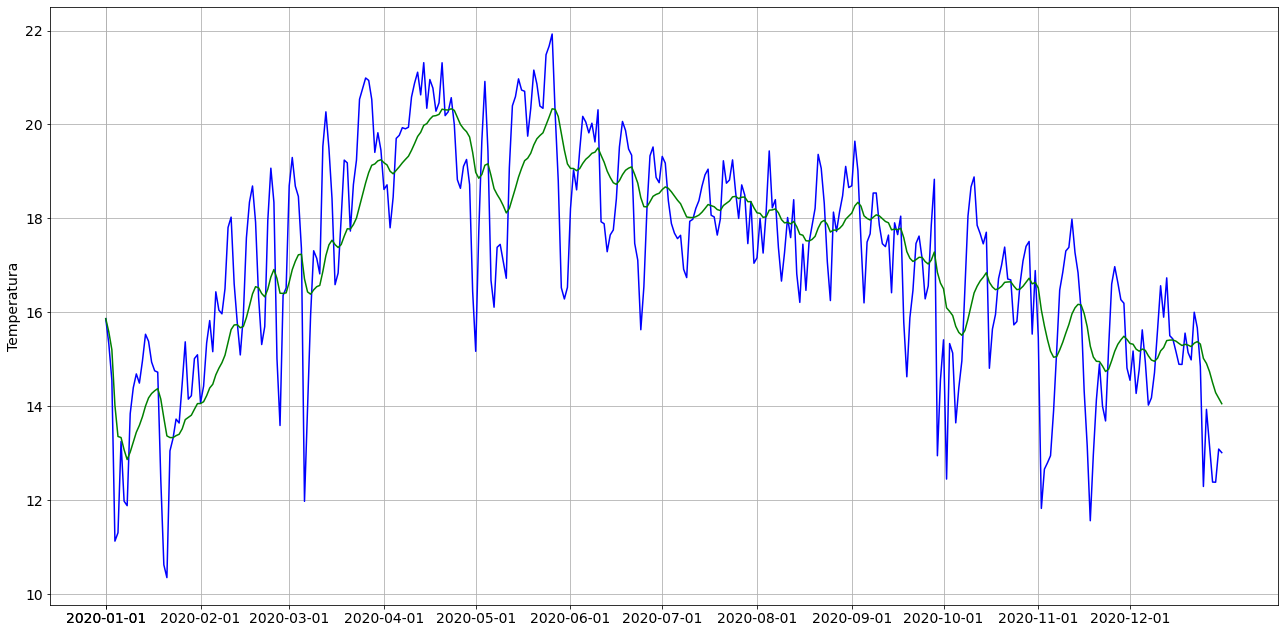

In [15]:
# Representación gráfica del conjunto de datos
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(22, 11))
plt.plot(df_new['FECHA'], df_new['TEMPERATURA'], 'b')
plt.plot(df_new['FECHA'], v_df, 'g')

plt.ylabel('Temperatura', fontsize=14)
plt.xticks(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2020-01'], fontsize=14)
plt.yticks(fontsize=14)
plt.grid()

plt.show()

In [16]:
list(range(24, len(df_prod), 24))

[24,
 48,
 72,
 96,
 120,
 144,
 168,
 192,
 216,
 240,
 264,
 288,
 312,
 336,
 360,
 384,
 408,
 432,
 456,
 480,
 504,
 528,
 552,
 576,
 600,
 624,
 648,
 672,
 696,
 720,
 744,
 768,
 792,
 816,
 840,
 864,
 888,
 912,
 936,
 960,
 984,
 1008,
 1032,
 1056,
 1080,
 1104,
 1128,
 1152,
 1176,
 1200,
 1224,
 1248,
 1272,
 1296,
 1320,
 1344,
 1368,
 1392,
 1416,
 1440,
 1464,
 1488,
 1512,
 1536,
 1560,
 1584,
 1608,
 1632,
 1656,
 1680,
 1704,
 1728,
 1752,
 1776,
 1800,
 1824,
 1848,
 1872,
 1896,
 1920,
 1944,
 1968,
 1992,
 2016,
 2040,
 2064,
 2088,
 2112,
 2136,
 2160,
 2184,
 2208,
 2232,
 2256,
 2280,
 2304,
 2328,
 2352,
 2376,
 2400,
 2424,
 2448,
 2472,
 2496,
 2520,
 2544,
 2568,
 2592,
 2616,
 2640,
 2664,
 2688,
 2712,
 2736,
 2760,
 2784,
 2808,
 2832,
 2856,
 2880,
 2904,
 2928,
 2952,
 2976,
 3000,
 3024,
 3048,
 3072,
 3096,
 3120,
 3144,
 3168,
 3192,
 3216,
 3240,
 3264,
 3288,
 3312,
 3336,
 3360,
 3384,
 3408,
 3432,
 3456,
 3480,
 3504,
 3528,
 3552,
 3576,
 3